# Model manually implemented

_This notebook is made by Katoo_

### Importing libraries
- pandas (pd): A library used for data manipulation and analysis, mainly working with dataframes.
- train_test_split: Function from sklearn.model_selection to split the dataset into training and testing sets.
- RandomForestRegressor: A machine learning model used for regression tasks.
- matplotlib.pyplot (plt): A library for creating static, animated, and interactive visualizations in Python.
- KFold and cross_val_score: Used for cross-validation, splitting the dataset into 'k' folds for training and testing.
- LinearRegression: A regression model from sklearn.linear_model for predicting numerical values.
- StandardScaler: Standardizes the features (scaling them to have mean = 0 and variance = 1).
- DecisionTreeRegressor: A regression model based on a decision tree algorithm.
- r2_score, mean_absolute_error, mean_squared_error: Metrics to evaluate the performance of regression models.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Data preprocessing
- Loading CSV file into dataframe
- Copy of dataframe to avoid modifying the original dataframe directly
- Converting categorical variables into numerical values of type float32

In [7]:
df = pd.read_csv('cleaned_subset.csv')

df = df.copy()
df['town/city'] = df['town/city'].factorize()[0].astype('float32')
df['district'] = df['district'].factorize()[0].astype('float32')
df['county'] = df['county'].factorize()[0].astype('float32')
df

,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__S,property_type_is__T,property_type_is__F
0,14.063110,0,0.0,0.0,0.0,2016,3,21,0,0,0,1
1,12.860999,0,0.0,1.0,0.0,2016,4,15,0,0,0,1
2,13.199324,0,0.0,0.0,0.0,2016,4,21,0,0,0,1
3,14.063110,0,0.0,0.0,0.0,2016,3,31,0,0,1,0
4,14.063110,0,0.0,0.0,0.0,2016,3,31,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1032553,11.813030,0,293.0,151.0,39.0,2016,10,20,0,0,1,0
1032554,12.254863,0,291.0,151.0,39.0,2016,11,15,0,0,0,0
1032555,12.660328,0,297.0,151.0,39.0,2016,11,15,0,0,0,0
1032556,13.758940,0,292.0,149.0,37.0,2016,10,25,0,0,0,0


### Feature selection and data splitting
- Selecting columns that will be used as features for the model
- Extracting feature columns from database
- Extracting target variable
- Splitting data into training and test sets for model evaluation

In [8]:
feat_cols=['district', 'county', 'old/new', 'year', 'month', 'town/city', 'property_type_is__D', 'property_type_is__F', 
'property_type_is__S', 'property_type_is__T']

X = df[feat_cols]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature scaling
- StandardScaler: scales features to have mean of 0 and standard deviation of 1
    - Helps model perform better (more consistent and efficient -> focus on patterns in data)
- Fitting scaler to training data and transforms it into normalized data
- Creating new dataframe with scaled features

In [9]:
scaler = StandardScaler()

normalized_array = scaler.fit_transform(X_train[feat_cols])
normalized_X_train = pd.DataFrame(normalized_array, columns=feat_cols)

### K-fold cross-validation
- KFold: Creates 20 folds in training data for cross-validation
    - Helps assess the model by training it on different subsets and evaluating on others
- LinearRegression: Initializes a linear regression model
- DecisionTreeRegressor: Initializes decision tree regressor model
- Computing cross-validation scores (evaluates model using k-fold splits)
    - instance of model
    - normalized_X_train: feature matrix for training data
    - y_train: target variable
    - cv = kf: cross-vaidation strategy

In [10]:
# Linear regression
kf = KFold(n_splits = 30, random_state = None)
lreg = LinearRegression()
avg_lreg_score = cross_val_score(lreg , normalized_X_train, y_train, cv = kf)

# Decision tree regressor
kf = KFold(n_splits = 30, random_state = None)
tr_regressor = DecisionTreeRegressor(random_state = 0)
avg_tr_score = cross_val_score(tr_regressor, normalized_X_train, y_train, cv = kf)

### Model fitting and prediction
- Fitting Linear Regression model / Decision Tree model to training data
- Predicting target for test set
    - X_test[feat_cols]: selects features for test set from original X_test
    - scaler.transform(): applies same scaling to test data as we applied to training data
        -  we fit scaler on the training data, and then use it to transform both training and test data. This ensures test data is scaled in the same way as the training data.

In [11]:
# Linear Regression:
lreg.fit(normalized_X_train, y_train) 
y_pred_lreg = lreg.predict(scaler.transform(X_test[feat_cols]))

# Decision Tree Regressor:
tr_regressor.fit(normalized_X_train, y_train) 
y_pred_tr = tr_regressor.predict(scaler.transform(X_test[feat_cols]))

c:\Users\Katoo\OneDrive - Thomas More\Jaar 3\Cloud AI\CloudAI\UK housing\venv_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Katoo\OneDrive - Thomas More\Jaar 3\Cloud AI\CloudAI\UK housing\venv_2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Model evaluation and storing
- R2 score: measures how well the model explains the data
    - value between 1 (= perfect) and 0
- Mean absolute error: average size of the errors in model's predictions
    - smaller MAE: closer to actual predictions
- Mean squared error: average of squared difference between predicted and actual values
    - smaller MSE: model's predictions are generally accurate and not making big errors
- Metrics stored in dictionary
- Converting dicktionary into dataframe
- Saving dataframe to csv for future comparison

In [ ]:
# R2 linear regression
r2_lreg = r2_score(y_test, y_pred_lreg)
print(f"R^2 - Lineaire Regressie: {r2_lreg}")

# MAE linear regression
mae_lreg = mean_absolute_error(y_test, y_pred_lreg)
print(f"MAE - Linear Regression: {mae_lreg}")

# Mean Squared Error linear regression
mse_lreg = mean_squared_error(y_test, y_pred_lreg)
print(f"MSE - Linear Regression: {mse_lreg}")


# R2 decision Tree 
r2_tr = r2_score(y_test, y_pred_tr)
print(f"R^2 - Decision Tree Regressor: {r2_tr}")

# MAE decision Tree 
mae_tr = mean_absolute_error(y_test, y_pred_tr)
print(f"MAE - Decision Tree: {mae_tr}")

# Mean Squared Error decision Tree 
mse_tr = mean_squared_error(y_test, y_pred_tr)
print(f"MSE - Decision Tree: {mse_tr}")


# Organize metrics into a dictionary
metrics = {
    "Metric": ["R²", "Mean Absolute Error (MAE)", "Mean Squared Error (MSE)"],
    "Linear Regression": [r2_lreg, mae_lreg, mse_lreg],
    "Decision Tree": [r2_tr, mae_tr, mse_tr]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Save the DataFrame to a CSV file
metrics_df.to_csv("model_metrics_comparison.csv", index=False)

R^2 - Lineaire Regressie: 0.22570517375273114
MAE - Linear Regression: 0.4701565246867898
MSE - Linear Regression: 0.36879430257587126
R^2 - Decision Tree Regressor: 0.6101785626341214
MAE - Decision Tree: 0.2902394698636551
MSE - Decision Tree: 0.18567078101147264


### Visualisations of actual vs predicted values and their distributions
1. Line plot: actual vs predicted values
    - Provides a direct comparison between the actual and predicted values
        - red line: represents a perfect prediction
        - dots: predicted values
2. Histogram: distribution of actual vs predicted prices
    - Compares distribution of actual vs predicted values, providing insights into any biases in the predictions
        

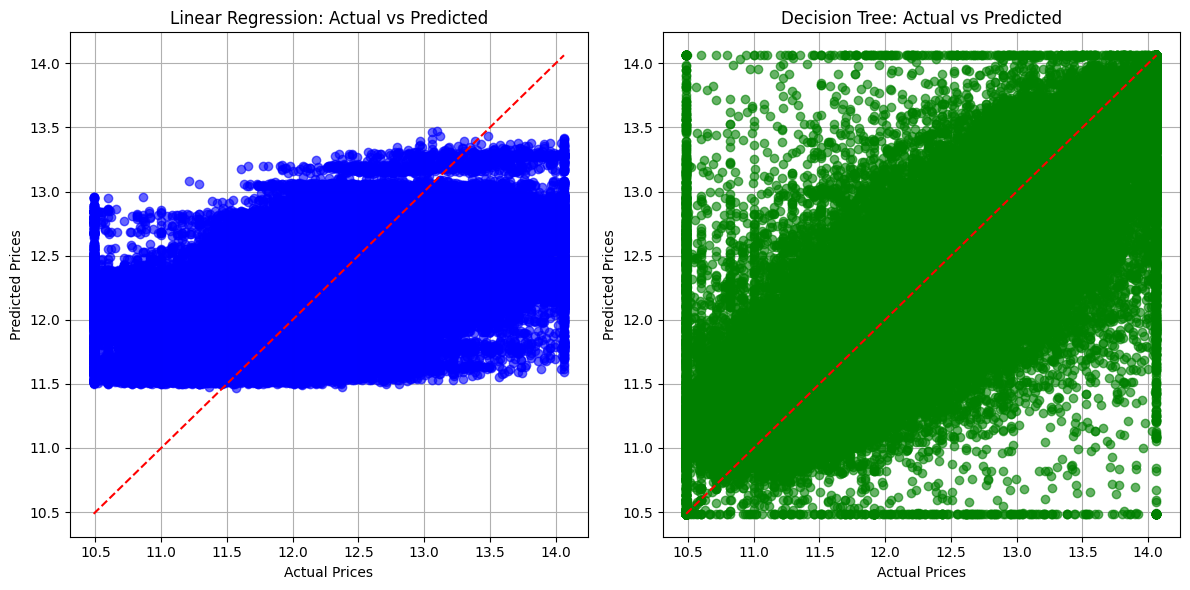

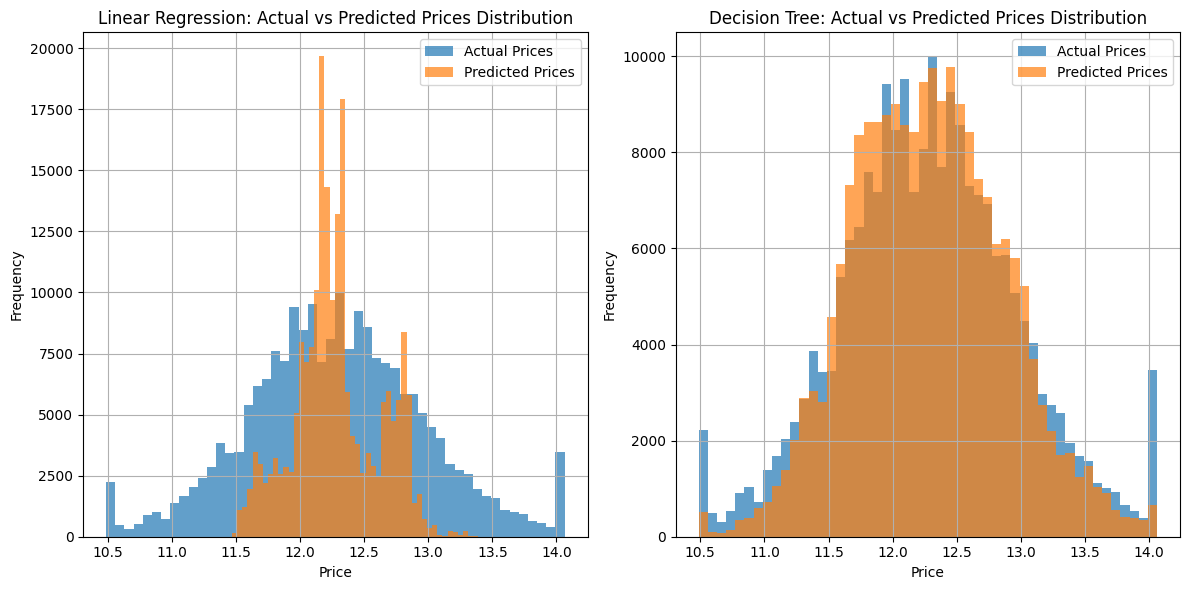

In [13]:
# Plotting Actual vs Predicted for Linear Regression (Line Plot)
plt.figure(figsize=(12,6))

# Linear Regression: Plot Actual vs Predicted using a line plot
plt.subplot(1, 2, 1)  # Creates 1 row, 2 columns, 1st subplot
plt.plot(y_test, y_pred_lreg, 'bo', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)

# Decision Tree: Plot Actual vs Predicted using a line plot
plt.subplot(1, 2, 2)  # 2nd subplot
plt.plot(y_test, y_pred_tr, 'go', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)

plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()

# Plotting Histograms for Actual vs Predicted Prices
plt.figure(figsize=(12, 6))

# Linear Regression: Plot histogram for actual and predicted prices
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=50, alpha=0.7, label='Actual Prices')
plt.hist(y_pred_lreg, bins=50, alpha=0.7, label='Predicted Prices')
plt.legend(loc='upper right')
plt.title("Linear Regression: Actual vs Predicted Prices Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)

# Decision Tree: Plot histogram for actual and predicted prices
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=50, alpha=0.7, label='Actual Prices')
plt.hist(y_pred_tr, bins=50, alpha=0.7, label='Predicted Prices')
plt.legend(loc='upper right')
plt.title("Decision Tree: Actual vs Predicted Prices Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()  
plt.show()
